<h1>Time Series Data Visualization with Python</h1><br>
https://machinelearningmastery.com/time-series-data-visualization-with-python/

In [2]:
import ts_input as ui   
from pandas import Series
from matplotlib import pyplot
file_path = '../input/daily-minimum-temperatures-in-me.csv'
series = ui.load_series_data(file_path)

In [3]:
print(series.head())

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Daily minimum temperatures in Melbourne, Australia, 1981-1990, dtype: float64


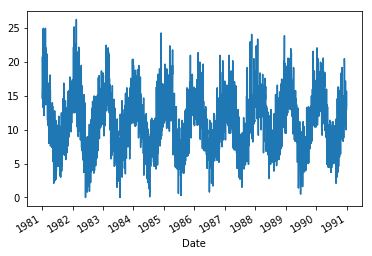

In [4]:
series.plot()
pyplot.show()

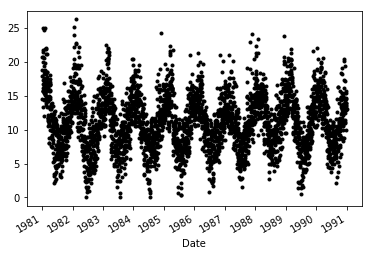

In [6]:
series.plot(style='k.')
pyplot.show()

/Users/gonsoomoon/anaconda/envs/tf1.5/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """


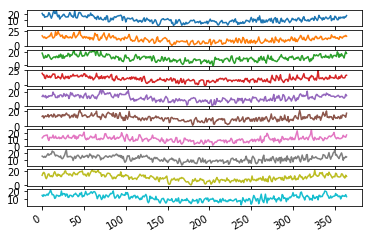

In [7]:
from pandas import Series
from pandas import DataFrame
from pandas import TimeGrouper

groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years.plot(subplots=True, legend=False)
pyplot.show()

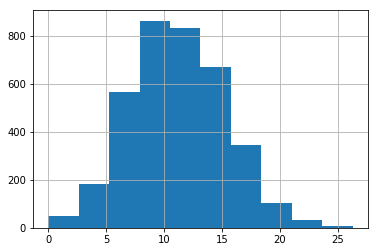

In [8]:
series.hist()
pyplot.show()

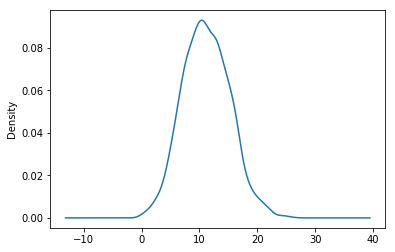

In [9]:
series.plot(kind='kde')
pyplot.show()

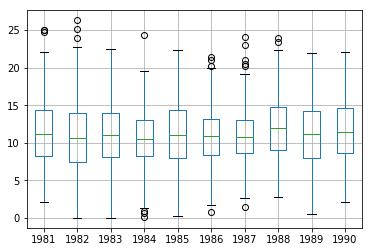

In [10]:
years.boxplot()
pyplot.show()

/Users/gonsoomoon/anaconda/envs/tf1.5/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  This is separate from the ipykernel package so we can avoid doing imports until


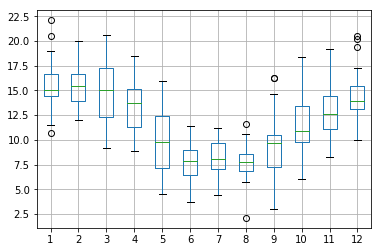

In [11]:
from pandas import concat
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
months.boxplot()
pyplot.show()

/Users/gonsoomoon/anaconda/envs/tf1.5/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  """Entry point for launching an IPython kernel.


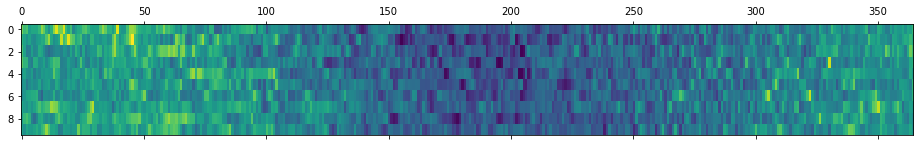

In [12]:
groups = series.groupby(TimeGrouper('A'))
years = DataFrame()
for name, group in groups:
    years[name.year] = group.values
years = years.T
pyplot.matshow(years, interpolation=None, aspect = 'auto')
pyplot.show()

/Users/gonsoomoon/anaconda/envs/tf1.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.TimeGrouper is deprecated and will be removed; Please use pd.Grouper(freq=...)
  


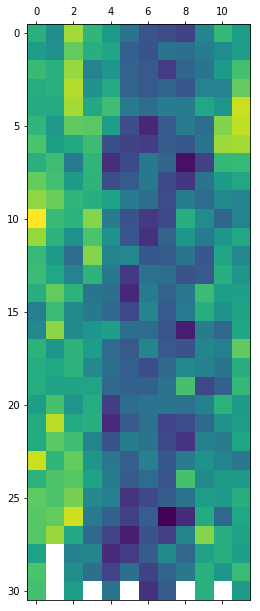

In [13]:
one_year = series['1990']
groups = one_year.groupby(TimeGrouper('M'))
months = concat([DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
pyplot.matshow(months, interpolation=None, aspect='auto')
pyplot.show()

/Users/gonsoomoon/anaconda/envs/tf1.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.lag_plot' is deprecated, import 'pandas.plotting.lag_plot' instead.
  


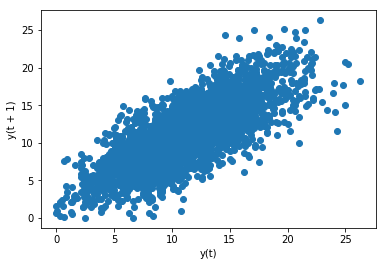

In [14]:
from pandas.tools.plotting import lag_plot
lag_plot(series)
pyplot.show()

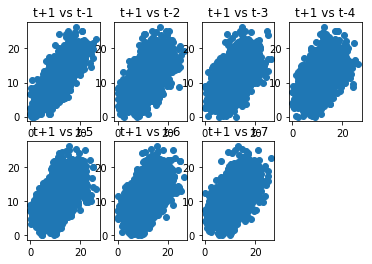

In [16]:
from pandas.plotting import scatter_matrix
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
pyplot.figure(1)
for i in range(1,(lags + 1)):
	ax = pyplot.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	pyplot.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
pyplot.show()

/Users/gonsoomoon/anaconda/envs/tf1.5/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: 'pandas.tools.plotting.autocorrelation_plot' is deprecated, import 'pandas.plotting.autocorrelation_plot' instead.
  


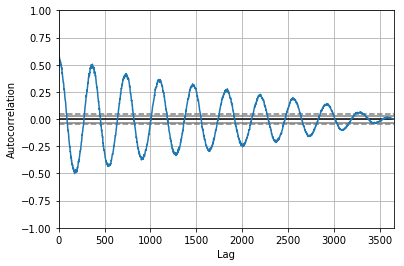

In [17]:
from pandas.tools.plotting import autocorrelation_plot
autocorrelation_plot(series)
pyplot.show()